In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [139]:
flame = pd.read_csv("data/FireBox-flameAnalogRead.csv", index_col='time')
gas = pd.read_csv("data/FireBox-gasAnalogRead.csv", index_col='time')
humi = pd.read_csv("data/FireBox-humi.csv", index_col='time')
temp = pd.read_csv("data/FireBox-temp.csv", index_col='time')
pres2 = pd.read_csv("data/FireBox-presenceV2.csv", index_col='time')

print(flame)

dfs = [flame, gas, humi, temp, pres2]

start = pd.to_datetime('2025-04-18 00:00').tz_localize('UTC')
end   = pd.to_datetime('2025-05-02 00:00').tz_localize('UTC')

for i, df in enumerate(dfs):
    # df = df.copy()
    df.index = pd.to_datetime(df.index, utc=True).round('s')
    dfs[i]  = df.loc[(df.index >= start) & (df.index <= end)]
    
print(dfs[0])

                                value
time                                 
2025-04-09T17:42:18.071170945Z    932
2025-04-09T17:42:28.106860288Z    944
2025-04-09T17:42:38.244036009Z    944
2025-04-09T17:42:48.27956891Z     944
2025-04-09T17:42:58.314681035Z    944
...                               ...
2025-05-22T14:36:37.277496889Z    160
2025-05-22T14:36:47.417415828Z    161
2025-05-22T14:36:57.447272655Z    163
2025-05-22T14:37:07.487208228Z    177
2025-05-22T14:37:17.623262651Z    181

[352953 rows x 1 columns]
                           value
time                            
2025-04-18 00:00:07+00:00      1
2025-04-18 00:00:17+00:00      1
2025-04-18 00:00:27+00:00      1
2025-04-18 00:00:37+00:00      1
2025-04-18 00:00:47+00:00      1
...                          ...
2025-05-01 23:59:15+00:00      1
2025-05-01 23:59:25+00:00      1
2025-05-01 23:59:35+00:00      1
2025-05-01 23:59:45+00:00      1
2025-05-01 23:59:55+00:00      1

[118362 rows x 1 columns]


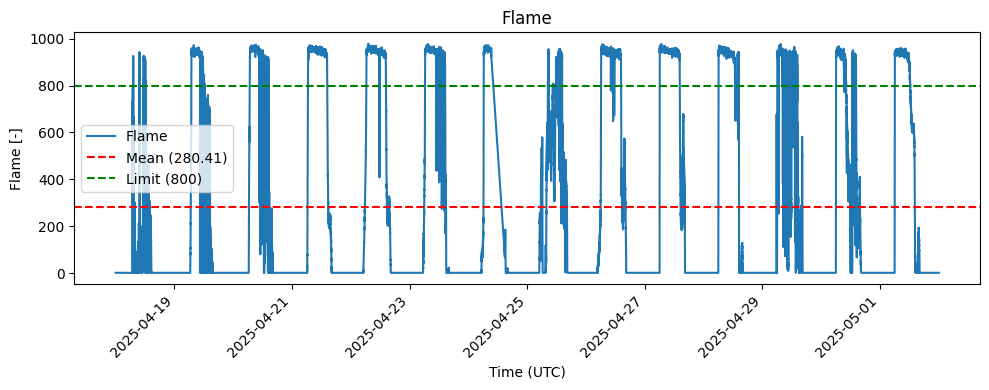

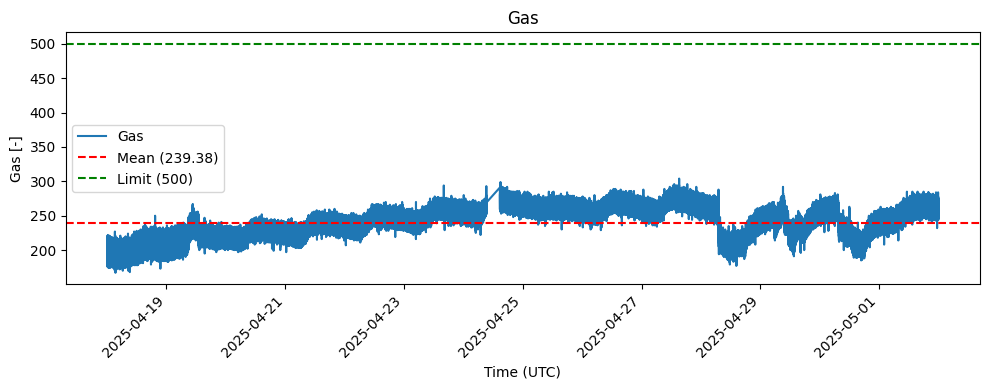

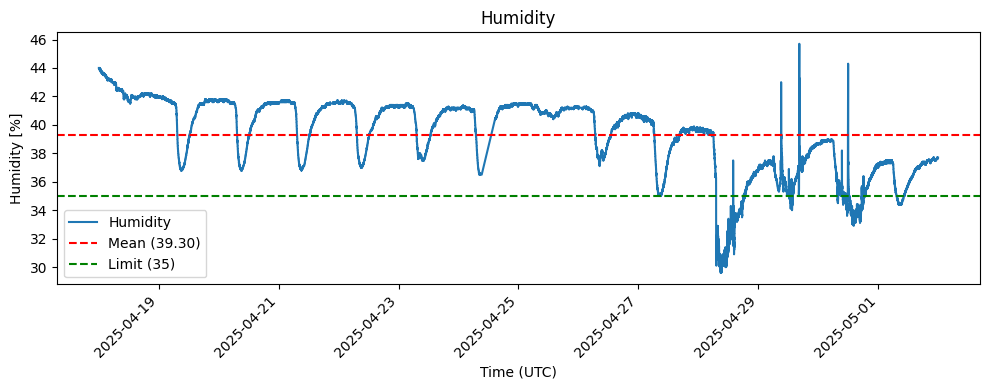

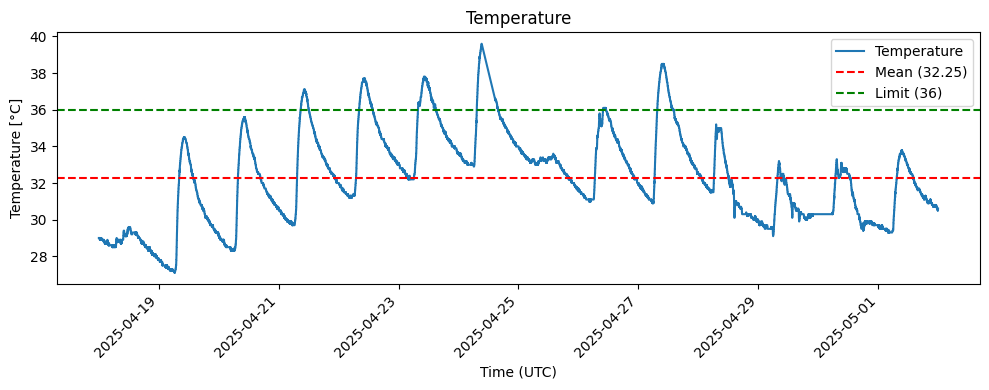

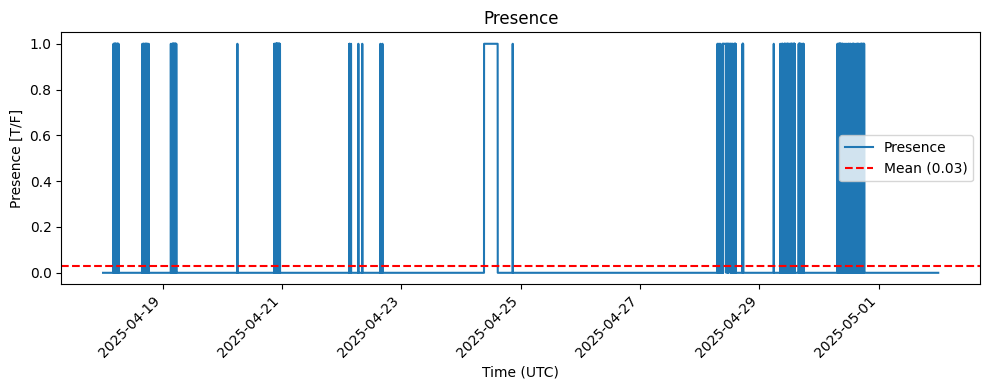

In [130]:
def plot_line_chart(data, title, y_label, limit=0):

    mean_val = data['value'].mean()

    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(data.index, data['value'], label=title)
    ax.axhline(mean_val, linestyle='--', color="red", label=f'Mean ({mean_val:.2f})')
    if limit:
        ax.axhline(limit, linestyle='--', color="green", label=f'Limit ({limit:})')

    ax.set_xlabel('Time (UTC)')
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.legend()

    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    fig.savefig(f'plots/line/{title.split()[0]}.png', dpi=300, bbox_inches='tight')
    

plot_line_chart(dfs[0], "Flame", "Flame [-]", 800)
plot_line_chart(dfs[1], "Gas", "Gas [-]", 500)
plot_line_chart(dfs[2], "Humidity", "Humidity [%]", 35)
plot_line_chart(dfs[3], "Temperature", "Temperature [°C]", 36)
plot_line_chart(dfs[4], "Presence", "Presence [T/F]")


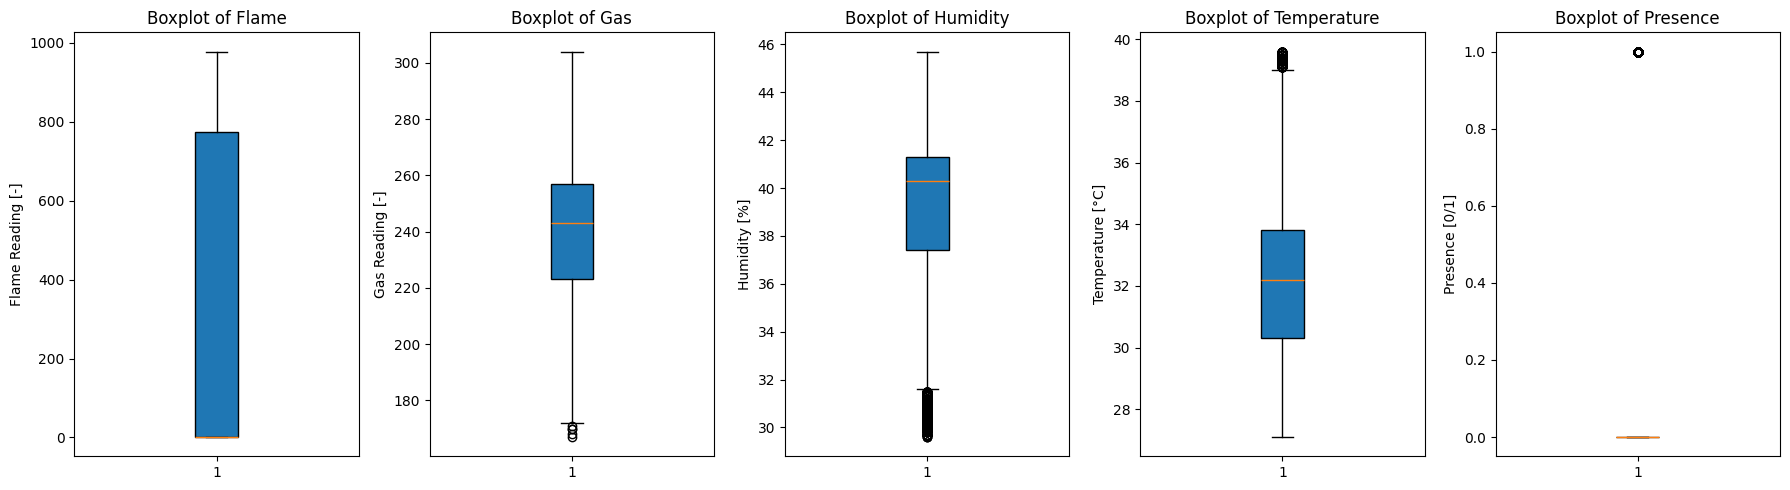

In [137]:
titles   = ['Flame', 'Gas', 'Humidity', 'Temperature', 'Presence']
ylabels  = ['Flame Reading [-]', 'Gas Reading [-]', 'Humidity [%]', 'Temperature [°C]', 'Presence [0/1]']

plt.figure(figsize=(18, 5))

for i, df in enumerate(dfs[:5]):
    vals = df['value']
    if vals.dtype == 'bool':
        vals = vals.astype(int)
    
    ax = plt.subplot(1, 5, i+1)
    ax.boxplot(vals, patch_artist=True)
    ax.set_title(f'Boxplot of {titles[i]}')
    ax.set_ylabel(ylabels[i])

plt.tight_layout()
plt.show()


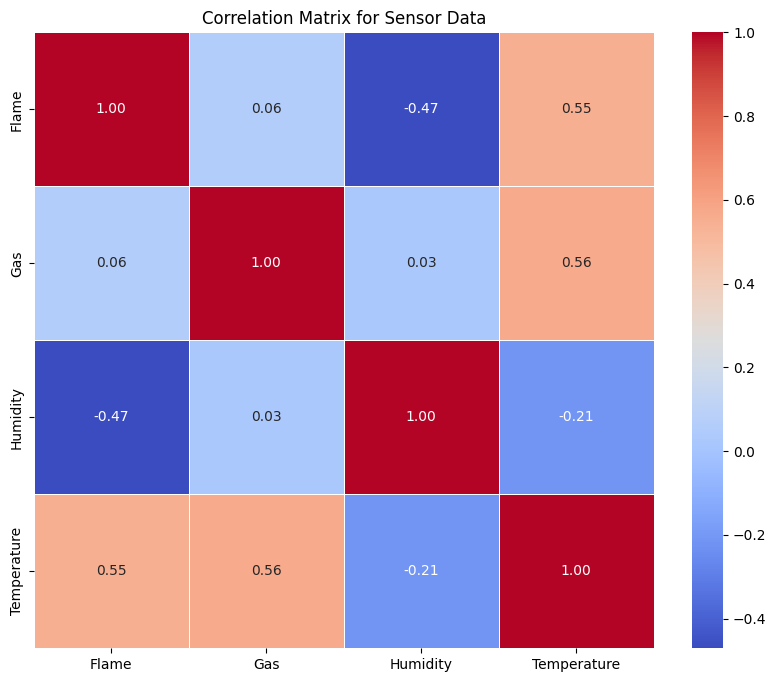

In [ ]:
import seaborn as sns

merged_data = pd.concat(dfs[:-1], axis=1, join='outer')
merged_data.columns = ["Flame", "Gas", "Humidity", "Temperature"]
correlation_matrix = merged_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Sensor Data')
plt.show()

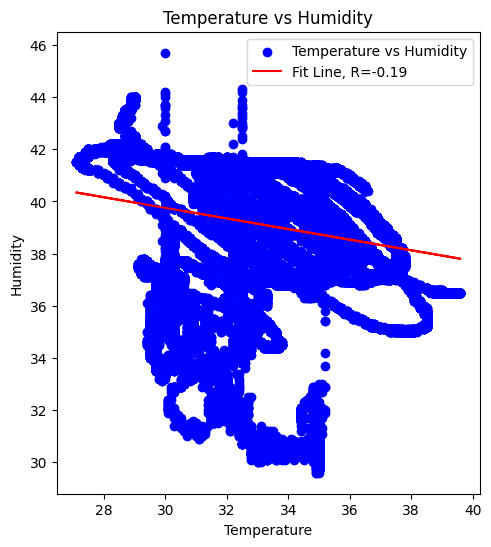

In [ ]:
# from scipy.stats import linregress


# # Fit linear regression for temperature vs humidity
# slope_temp, intercept_temp, r_value_temp, p_value_temp, std_err_carbon = linregress(dfs[3].value, dfs[2].value)
# line_temp = slope_temp * dfs[3] + intercept_temp

# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.scatter(dfs[3], dfs[2], color='blue', label='Temperature vs Humidity')
# plt.plot(dfs[3], line_temp, 'r', label=f'Fit Line, R={r_value_temp:.2f}')
# plt.title('Temperature vs Humidity')
# plt.xlabel('Temperature')
# plt.ylabel('Humidity')
# plt.legend()
